텐서에는 node,edge로 구성. 전자는 operation,edge는 tensor로 실제로 데이터가 흘러감.

메모리 할당하거나 어떤 값을 갖고있지 않으며 연산노드를 가리키는 객체에 가까운게 텐서다.

rank,shape,type으로 이루어짐

In [1]:
import tensorflow as tf

In [2]:
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1=[i[0] for i in data]
x2=[i[1] for i in data]
y_data=[i[2] for i in data]

In [3]:
a1=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))
y=a1*x1+a2*x2+b

In [4]:
rmse=tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))
learning_rate=0.001
gradient_descent=tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(gradient_descent)
        if step%100==0:
            print('epoch: %.f,rmse=%.4f,기울기 a1 = %.4f,기울기 a2=%.4f,y절편 b =%.4f'%(step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))
            z=sess.run(y)
            print('R1 =%d,R2=%d,R3=%d,R4=%d'%(z[0],z[1],z[2],z[3]))
#랜덤값을 주는 이유:엉뚱한 곳을 잡으면 시간이 많이 걸리기 때문. 값을 한정한 데서 시간을 줄임.

epoch: 0,rmse=52.8096,기울기 a1 = 8.0636,기울기 a2=8.0665,y절편 b =80.6892
R1 =96,R2=145,R3=145,R4=169
epoch: 100,rmse=49.1480,기울기 a1 = 7.5218,기울기 a2=7.8133,y절편 b =80.5971
R1 =95,R2=141,R3=141,R4=164
epoch: 200,rmse=45.4883,기울기 a1 = 6.9803,기울기 a2=7.5597,y절편 b =80.5049
R1 =94,R2=138,R3=137,R4=159
epoch: 300,rmse=41.8311,기울기 a1 = 6.4393,기울기 a2=7.3057,y절편 b =80.4128
R1 =93,R2=135,R3=133,R4=153
epoch: 400,rmse=38.1769,기울기 a1 = 5.8988,기울기 a2=7.0512,y절편 b =80.3206
R1 =92,R2=132,R3=129,R4=148
epoch: 500,rmse=34.5267,기울기 a1 = 5.3589,기울기 a2=6.7961,y절편 b =80.2285
R1 =90,R2=128,R3=125,R4=143
epoch: 600,rmse=30.8820,기울기 a1 = 4.8199,기울기 a2=6.5403,y절편 b =80.1363
R1 =89,R2=125,R3=122,R4=138
epoch: 700,rmse=27.2448,기울기 a1 = 4.2820,기울기 a2=6.2836,y절편 b =80.0442
R1 =88,R2=122,R3=118,R4=133
epoch: 800,rmse=23.6184,기울기 a1 = 3.7456,기울기 a2=6.0258,y절편 b =79.9522
R1 =87,R2=119,R3=114,R4=127
epoch: 900,rmse=20.0086,기울기 a1 = 3.2114,기울기 a2=5.7667,y절편 b =79.8602
R1 =86,R2=115,R3=110,R4=122
epoch: 1000,rmse=16.4256,기울기 a1 

a,a2,b,x,rmse는 텐서이지만 gradient decent는 train이므로 train에 저장되어있는 gradient descent optimizer 함수를 이용하여 optimizer라는 operation을 만들고 cost를 줄이는게 목적. minimize를 호출시켜 우리가 값을 줄이고자 하는 cost 전달

In [5]:
import numpy as np

In [15]:
blood_fat=np.loadtxt('Blood_fat.csv',delimiter=',')

In [27]:
x1=[xrow[0] for xrow in blood_fat]
x2=[xrow[1] for xrow in blood_fat]
y_data=[xrow[2] for xrow in blood_fat]

In [28]:
a1=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))
y=a1*x1+a2*x2+b

In [31]:
rmse=tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))
learning_rate=0.001
gradient_descent=tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_descent)#오차를 최소화하는 알고리즘.그 자체의 그래프를 돌림
        if step%100==0:           
            print('epoch: %.f,rmse=%.4f,기울기 a1 = %.4f,기울기 a2=%.4f,y절편 b=%.4f'%(step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))
            #rmse,a,b는 텐서임.값을 볼려면 run을 시켜줘야함.
            z=sess.run(y)#session 상태에서 안돌리면 그래프임.
            #z는 배열의 시작 주소.
            da1=sess.run(a1)
            da2=sess.run(a2)
            db=sess.run(b)
            print(da1,da2,db)
    for i in range(20):
        print((da1*x1[i]+da2*x2[i]+db),y_data[i])

epoch: 0,rmse=643.9146,기울기 a1 = 7.9995,기울기 a2=8.0295,y절편 b =80.6891
[7.99945558] [8.02947076] [80.68914637]
epoch: 100,rmse=51.0198,기울기 a1 = 1.2999,기울기 a2=4.2778,y절편 b =80.5946
[1.29992372] [4.27776566] [80.59463733]
epoch: 200,rmse=42.6573,기울기 a1 = 0.8654,기울기 a2=4.3693,y절편 b =80.5900
[0.86542757] [4.36930983] [80.58996441]
epoch: 300,rmse=42.1239,기울기 a1 = 0.7509,기울기 a2=4.5693,y절편 b =80.5895
[0.75094944] [4.56931597] [80.58945714]
epoch: 400,rmse=41.8101,기울기 a1 = 0.6632,기울기 a2=4.7227,y절편 b =80.5890
[0.6631554] [4.72270311] [80.58902581]
epoch: 500,rmse=41.6278,기울기 a1 = 0.5962,기울기 a2=4.8396,y절편 b =80.5887
[0.59624432] [4.83960617] [80.58865424]
epoch: 600,rmse=41.5226,기울기 a1 = 0.5454,기울기 a2=4.9284,y절편 b =80.5883
[0.54543868] [4.92837184] [80.58832896]
epoch: 700,rmse=41.4623,기울기 a1 = 0.5069,기울기 a2=4.9956,y절편 b =80.5880
[0.50694617] [4.99562554] [80.58803917]
epoch: 800,rmse=41.4277,기울기 a1 = 0.4778,기울기 a2=5.0465,y절편 b =80.5878
[0.47781962] [5.04651621] [80.58777646]
epoch: 900,rmse=41.40

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

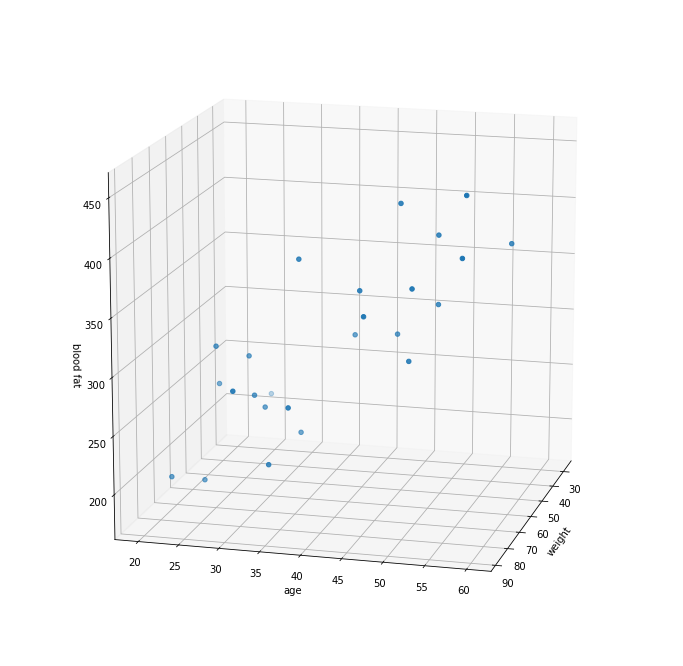

In [30]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x1,x2,y_data)
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood fat')
ax.view_init(15,15)
plt.show()

# 로지스틱 회귀

참/거짓을 구분하는 로지스틱회귀-> 참,거짓 미니 판단 장치를 만들어 주어진 입력값의 특징 추출

머신러닝 딥러닝의 차이:최근 가장많이사용하는게 머신러닝. 그 중에 가장 많이 사용하는게 딥러닝.딥러닝은 깊이가 있는 러닝.입력과 출력의 존재만으로 선형회귀,로지스틱을 할 수 있는게 머신러닝. 딥러닝은 입력과 출력 속에 은닉층을 두게 됨.보이지 않는 곳으로 들어가 심층학습을 한다는 의미다.

a값이 커지면 경사가 커지고 아니면 작아짐.

a값이 작아지면 오차는 커지고 커진다 해서 오차가 무한대로 커지진 않음. a가 커질수록 오차가 작아짐.

b값은 너무 크거나 작을 경우 오차가 무한대로 커지므로 이차함수 그래프로 표현 가능


sigmoid 함수에 비용 함수를 평균제곱오차로 하여 그래프를 그리면 로컬미니멈,글로벌미니멈 발생.경사하강법을 사용할 때 잘못된 최소값에 빠짐. 이를 전체함수에 걸쳐 최소인 글로벌이 아닌 특정 구역에서 최소인 로컬 미니멈에 도달했다고 표현. 이는 cost가 최소가 되는 가중치를 찾는다는 비용 함수의 목적에 맞지 않음

실제가 1인데 1에 가까워지면 오차 커지고 반대일 경우에도 마찬가지. 이를 공식으로 쓸 수 있는게 로그함수.

=>로지스틱 회귀에서 w를 최소로 만드는 새로운 비용함수를 찾아야함. 0~1 사이의 정보로 표현되는 조건을 충족하기 위해 -logx와 -log(1-x)를 사용

목적함수: 가중치를 최소화하는 함수

In [1]:
import tensorflow as tf
import numpy as np

In [30]:
data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data=[x[0] for x in data]
y_data=[x[1] for x in data]

a=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))
#uniform은 그 값의 데이터들은 균일함.평소엔 대부분 그 값범위 내에서 
#시작함.
#uniform은 동일한 확률에서 나옴
#normal에선 범위가 지정되지 않았지만 정규분포로부터 난수값을 받음.
#일정 값을 뽑아내지만 정규분포의 평균과 표준편차 내에서 받음.
#선형회귀에서는 특정 범위에서 찾기 편함

y=1/(1+np.e**-(a*x_data+b))

In [31]:
loss=-tf.reduce_mean(np.array(y_data)*tf.log(y)+(1-np.array(y_data))*tf.log(1-y))
learning_rate=0.5
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('epoch: %.f,loss=%.4f,기울기 a=%.4f,y절편 : %.4f'%
                 (i,sess.run(loss),sess.run(a),sess.run(b)))
            #z=sess.run(y)
            #da=sess.run(a)
            #db=sess.run(b)
    #x_d=[5,7,13]
    #for i in range(len(x_d)):
        #print('if %d = %.f'%(x_d[i],1/(1+np.e**(da*x_d[i]+db))))
        
    new_x_data=5
    y_test=1/(1+np.e**-((a*new_x_data)+b))
    print(sess.run(y_test))
    
    new_x_data=7
    y_test=1/(1+np.e**-((a*new_x_data)+b))
    print(sess.run(y_test))
    
    new_x_data=13
    y_test=1/(1+np.e**-((a*new_x_data)+b))
    print(sess.run(y_test))
    
    print(y_test)

epoch: 0,loss=4.0817,기울기 a=2.4706,y절편 : -0.3620
epoch: 6000,loss=0.0152,기울기 a=2.9230,y절편 : -20.3114
epoch: 12000,loss=0.0081,기울기 a=3.5648,y절편 : -24.8081
epoch: 18000,loss=0.0055,기울기 a=3.9564,y절편 : -27.5511
epoch: 24000,loss=0.0041,기울기 a=4.2385,y절편 : -29.5268
epoch: 30000,loss=0.0033,기울기 a=4.4590,y절편 : -31.0705
epoch: 36000,loss=0.0028,기울기 a=4.6399,y절편 : -32.3371
epoch: 42000,loss=0.0024,기울기 a=4.7933,y절편 : -33.4107
epoch: 48000,loss=0.0021,기울기 a=4.9263,y절편 : -34.3424
epoch: 54000,loss=0.0019,기울기 a=5.0439,y절편 : -35.1653
epoch: 60000,loss=0.0017,기울기 a=5.1491,y절편 : -35.9020
[3.88235157e-05]
[0.53537986]
[1.]
Tensor("truediv_27:0", shape=(1,), dtype=float64)


In [10]:
loss=-tf.reduce_mean(np.array(y_data)*tf.log(y)+(1-np.array(y_data))*tf.log(1-y))
learning_rate=0.01 #연산식이 없음.아날로그적.초파라미터임.경험치를 통해서 나타냄.
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('epoch: %.f,loss=%.4f,기울기 a=%.4f,y절편 : %.4f'%
                 (i,sess.run(loss),sess.run(a),sess.run(b)))

epoch: 0,loss=1.3590,기울기 a=-0.6180,y절편 : -0.6303
epoch: 6000,loss=0.1770,기울기 a=-0.6512,y절편 : 4.1848
epoch: 12000,loss=0.1248,기울기 a=-0.8862,y절편 : 5.9174
epoch: 18000,loss=0.1018,기울기 a=-1.0467,y절편 : 7.0781
epoch: 24000,loss=0.0878,기울기 a=-1.1732,y절편 : 7.9849
epoch: 30000,loss=0.0779,기울기 a=-1.2796,y절편 : 8.7440
epoch: 36000,loss=0.0705,기울기 a=-1.3725,y절편 : 9.4043
epoch: 42000,loss=0.0646,기울기 a=-1.4556,y절편 : 9.9931
epoch: 48000,loss=0.0598,기울기 a=-1.5310,y절편 : 10.5269
epoch: 54000,loss=0.0557,기울기 a=-1.6003,y절편 : 11.0169
epoch: 60000,loss=0.0522,기울기 a=-1.6646,y절편 : 11.4708


In [21]:
x_data=np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data=np.array([0,0,0,1,1,1,1]).reshape(7,1)

복사하여 값을 변경할 경우 원본의 값도 변경되는 것이 numpy 배열

a는 주소를 의미함.b는 a의 주소를 나타냄(a=b)

In [32]:
x=tf.constant([[1.0,2.0,3.0]])
w=tf.constant([[2.0],[2.0],[2.0]])
y=tf.matmul(x,w)
print(x.get_shape())

(1, 3)


In [33]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(y)
print(result)

[[12.]]


In [34]:
x=tf.constant([[1.,2.,3.]])
w=tf.constant([[2.],[2.],[2.]])
y=tf.matmul(x,w)

In [35]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(y)
print(result)

[[12.]]


In [36]:
input_data=[[1.,2.,3.],[1.,2.,3.],[2.,3.,4.]]
x=tf.placeholder(dtype=tf.float32,shape=[None,3])
w=tf.Variable([[2.],[2.],[2.]],dtype=tf.float32)
y=tf.matmul(x,w)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(y,feed_dict={x:input_data})

In [37]:
print(result)

[[12.]
 [12.]
 [18.]]


In [39]:
input_data=[[1,1,1],[2,2,2]]
x=tf.placeholder(dtype=tf.float32,shape=[2,3])
w=tf.Variable([[2],[2],[2]],dtype=tf.float32)
b=tf.Variable([4],dtype=tf.float32)
y=tf.matmul(x,w)+b
print(x.get_shape())

sess=tf.Session()
sess.run(tf.global_variables_initializer())
result=sess.run(y,feed_dict={x:input_data})
print(result)

(2, 3)
[[10.]
 [16.]]


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
x_data=np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data=np.array([0,0,0,1,1,1,1]).reshape(7,1)
np.random.seed(0)
tf.set_random_seed(0)#실행할 때마다 같은 결과 출력을 위함

In [3]:
X=tf.placeholder(tf.float64, shape=[None,2])
Y=tf.placeholder(tf.float64, shape=[None,1])
a=tf.Variable(tf.random_uniform([2,1],dtype=tf.float64))#들어오는 값2개 나가는값 1개
b=tf.Variable(tf.random_uniform([1],dtype=tf.float64))
y=tf.sigmoid(tf.matmul(X,a)+b)

In [4]:
loss=-tf.reduce_mean(Y*tf.log(y)+(1-Y)*tf.log(1-y))
learning_rate=0.1
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [5]:
predicted=tf.cast(y>0.5,dtype=tf.float64)#정밀도 측정 목적
#입력한 값의 결과를 자료형으로 변환,실수형태로 할 것.y>0.5일 때 1을 넘기고 아니면 0
#sigmoid 함수로 나온 값에서 cast에 해당하는 그래프가 있어 y의 값에서 0.5이상은 1 아님 0
#0,1로 캐스팅한 값이 들어감.
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float64))
#두개가 같으면 1 다르면 0으로 return.평균을 구하는 것.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3001):
        a_,b_,loss_,_=sess.run([a,b,loss,gradient_decent],
                              feed_dict={X:x_data,Y:y_data})#placeholder 사용했으므로
        if (i+1)%300==0:
            print('step: %d,a1= %.4f,a2= %.4f,b= %.4f,loss= %.4f'%
                 (i+1,a_[0],a_[1],b_,loss_))
    #t세션 닫기 전
    print('predicted=',sess.run(predicted,feed_dict={X:x_data}))
    #다른 값 테스트
    p_val,h_val=sess.run([predicted,y],feed_dict={X:[[1,5],[10,5],[4,5]]})
    print('check predicted = ',p_val)
    print('check hypothests = ',h_val)
    #정확도 측정
    h,c,a=sess.run([y,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis: ',h,'\nCorrect (Y):',c,'\nAccuracy: ',a)

step: 300,a1= 0.8426,a2= -0.5997,b= -2.3907,loss= 0.2694
step: 600,a1= 0.8348,a2= -0.3166,b= -3.8630,loss= 0.1932
step: 900,a1= 0.7423,a2= 0.0153,b= -4.9311,loss= 0.1510
step: 1200,a1= 0.6372,a2= 0.3245,b= -5.7765,loss= 0.1235
step: 1500,a1= 0.5373,a2= 0.5996,b= -6.4775,loss= 0.1042
step: 1800,a1= 0.4471,a2= 0.8421,b= -7.0768,loss= 0.0900
step: 2100,a1= 0.3670,a2= 1.0561,b= -7.6003,loss= 0.0791
step: 2400,a1= 0.2962,a2= 1.2458,b= -8.0652,loss= 0.0705
step: 2700,a1= 0.2336,a2= 1.4152,b= -8.4834,loss= 0.0636
step: 3000,a1= 0.1779,a2= 1.5675,b= -8.8635,loss= 0.0579
predicted= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted =  [[0.]
 [1.]
 [0.]]
check hypothests =  [[0.30010201]
 [0.67976582]
 [0.42222581]]

Hypothesis:  [[0.02177143]
 [0.03077785]
 [0.17854677]
 [0.87710296]
 [0.97993976]
 [0.99701815]
 [0.99956324]] 
Correct (Y): [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
